<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/More_Hyp_Testing_Scipy%26StatsMod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANOVA

Prueba que nos permite comprobar si el grupo al que pertenecen nuestros datos hacen diferencia significativa en los resultados.

- Normalidad
- Varianza entre grupos
- Independencia

$\mu_i=\mu_j$

### Construcción de anova

![ANOVA](https://camo.githubusercontent.com/f4be2d25ab16745e51ad1d15349badb3329ec78d/68747470733a2f2f73332d65752d776573742d312e616d617a6f6e6177732e636f6d2f69682d6d6174657269616c732f75706c6f6164732f646174612d7374617469632f696d616765732f616e6f76612e706e67)

##### Ej
Supongamos los siguientes datos

| Valor | Grupo |
|:-----:|:-----:|
| 3     | A     |
| 2     | A     |
| 1     | A     |
| 5     | B     |
| 3     | B     | 
| 4     | B     |
| 5     | C     |
| 6     | C     |
| 7     | C     |

Lo cual podemos resumir de la siguiente manera

| A | B | C |
|---|---|---|
| 3 | 5 | 5 |
| 2 | 3 | 6 |
| 1 | 4 | 7 |

- SST Variación total
- SSB Variación entre un grupo y otro
- SSE Variación dentro de los grupos

SST dof 8 \\
SSB dof 2 \\
SSE dof 6

Primero calculamos\
$\overline{X},\overline{X}_A,\overline{X}_B,\overline{X}_C$ \\
Resultando en \\
$\overline{X}=4$ \\
$\overline{X}_A=2$ \\
$\overline{X}_B=4$ \\
$\overline{X}_C=6$ \\
$$SST=\sum\sum(X-\overline{X})^2=30$$
$$SSB=\sum n_i(\overline{X}_i-\overline{X})^2=24$$
$$SSE=\sum\sum(X-\overline{X}_i)^2=6$$
$$MSB=\frac{24}{2}=12$$
$$MSE=\frac{6}{6}=1$$
$$F=12$$


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [ ]:
df1 = df[['sun','height']].copy()
df1.head()

,sun,height
0,low,6
1,low,6
2,low,6
3,low,5
4,low,6


In [ ]:
df1['sun_count']=df1.groupby('sun').cumcount()
df1_pivot = df1.pivot(index='sun_count',columns='sun',values='height')
df1_pivot.columns = ['sun_'+str(x) for x in df1_pivot.columns.values]

In [ ]:
df1_pivot

,sun_high,sun_low,sun_med
sun_count,,,
0,6.0,6.0,6.0
1,6.0,6.0,5.0
2,7.0,5.0,5.0
3,8.0,6.0,6.0
4,7.0,3.0,4.0
5,5.0,4.0,5.0
6,6.0,4.0,4.0
7,6.0,4.0,4.0
8,7.0,5.0,4.0


In [ ]:
f_oneway(df1_pivot.sun_high, df1_pivot.sun_low, df1_pivot.sun_med)

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
#df1.iat[0,0]='med'
df1.head()

,sun,height
0,med,6
1,low,6
2,low,6
3,low,5
4,low,6


In [ ]:
model_simp = ols('height ~ sun', data=df1).fit()

In [ ]:
sm.stats.anova_lm(model_simp, typ=2)

,sum_sq,df,F,PR(>F)
sun,24.165657,2.0,13.315221,0.000095
Residual,24.501010,27.0,NaN,NaN


In [ ]:
model_amb = ols('height ~ sun + water', data=df).fit()
sm.stats.anova_lm(model_amb, typ=2)

,sum_sq,df,F,PR(>F)
sun,24.866667,2.0,21.174672,0.000003
water,8.533333,1.0,14.532751,0.000762
Residual,15.266667,26.0,NaN,NaN


In [ ]:
model_duo = ols('height ~ sun*water', data=df).fit()
sm.stats.anova_lm(model_duo, typ=2)

,sum_sq,df,F,PR(>F)
sun,24.866667,2.0,23.3125,0.000002
water,8.533333,1.0,16.0000,0.000527
sun:water,2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


## Regresión Lineal

Es un módelo que nos permite representar una variable como combinación lineal de otras, es decir

$$ Y = \beta_0 + \beta_1X_1 +\dots+ \beta_nX_n$$

Para visualizar de mejor manera veremos el caso particular
$$ Y = \beta_0 + \beta_1X + \varepsilon$$

Podemos observarlo de la siguiente manera \\

(No supe subir la imagen jeje)

In [ ]:
from scipy.stats import linregress

In [ ]:
auto = pd.read_csv('sample_data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [ ]:
car = auto[['acceleration','mpg']].copy()

In [ ]:
car.head()

,acceleration,mpg
0,12.0,18.0
1,11.5,15.0
2,11.0,18.0
3,12.0,16.0
4,10.5,17.0


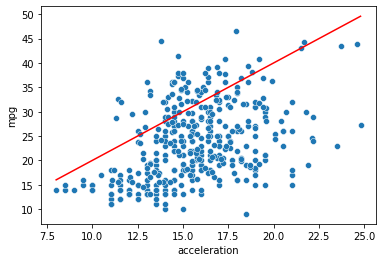

In [ ]:
fig = plt.figure(facecolor='w')
sns.scatterplot(x=car.acceleration, y=car.mpg)
x = [car.acceleration.min(), car.acceleration.max()]
y = [car.acceleration.min()*2, car.acceleration.max()*2]
sns.lineplot(x=x, y=y, color='r');

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(car.acceleration, car.mpg)
pvalue

1.8230915350787203e-18

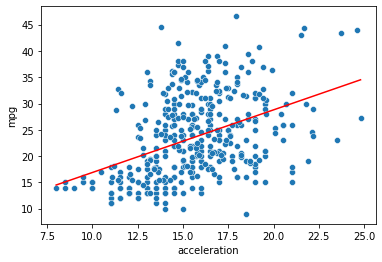

In [ ]:
fig = plt.figure(facecolor='w')
sns.scatterplot(x=car.acceleration, y=car.mpg)
x = [car.acceleration.min(), car.acceleration.max()]
y = [intercept+car.acceleration.min()*slope, intercept+car.acceleration.max()*slope]
sns.lineplot(x=x, y=y, color='r');

In [ ]:
X = sm.add_constant(car.acceleration)
y = car.mpg

In [ ]:
intercept

4.9697930042539085

In [ ]:
linreg_stats = sm.OLS(y, X).fit()

In [ ]:
print(linreg_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.82e-18
Time:                        22:42:20   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432   

In [ ]:
predicciones = linreg_stats.predict(X)

In [ ]:
X['predict'] = predicciones

In [ ]:
linreg_stats.predict([1,11])

array([18.07304283])